### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

The dependent variable is what we measure. In this case the time between the stimulus and the response.

The independent variable is what we manipulate. In the Stroop experiment it is whether the word and the color the word is written in is concruent or not. 

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

The Stroop experiment is done by repeating the same task (reading words of a given list) twice and manipulating the test setup between these two tasks. In this case the color of the words presented is changed. All other variables stay constant. For example the number of words. 

As usual instead of testing the whole population (in this expriment we would need to test all human beings) a random sample of humans is tested and statistics can be used to predict whether the manipulation has an effect and whether one can make assumptions about the whole population. 

Appropriate hypotheses for such a testing are: 

- The null hypothesis (that is the assumption before we run any test) is that the average response time of the task under the incongruent words condition is not different than that of the congruent words condition.
- The alternative hypothesis is that the reaction time is significantly different in the incongruent words condition that in the congurent words condition. 

Let $_{c}$ be the subscript for **congruent** and $_{i}$ the subscript for **incongruent**. Then the notation is

$H_{0}: \mu_{c} - \mu_{i} = 0$

and

$H_{1}: \mu_{c} - \mu_{i} \neq 0$

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [2]:
import pandas as pd
df = pd.read_csv('stroopdata.csv')
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [3]:
df.max() - df.min()

Congruent      13.698
Incongruent    19.568
dtype: float64

In [4]:
df.var()

Congruent      12.669029
Incongruent    23.011757
dtype: float64

- There are 24 rows in the dataset. 
- On average these 24 testees needed $\overline{x}_{c} = 14.05$ seconds and $\overline{x}_{i} = 22.01$ seconds to respond.
- The response time range is 13.698 seconds in the congruent test and 19.568 seconds in the incongruent test.
- The fastest response was 8.63 seconds in the congruent measure and 15.687 seconds in the incongurent measurement.
- The slowest reponse time was 22.328 seconds in the congurent words condition and 35.255 seconds in the incongurent words condition. 
- The median is $\tilde{x}_{c} = 14.357$ seconds and $\tilde{x}_{i} = 14.357$.
- The variance of the data is $s^2_{c} = 12.669$ and $s^2_{i} = 23.011$ as this is the square root of the standard deviation of $s_{c} = 3.599$ and $s_{i} = 4.797$.

These statistics suggest that the average response time in the incongruent words condition is higher than in the congruent word condition. But currently this difference can just be by coincidence.

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

I think the best plot to display the difference of the mean between two measurements is a box plot.

In [5]:
import matplotlib as plt
import seaborn as sns
%matplotlib inline

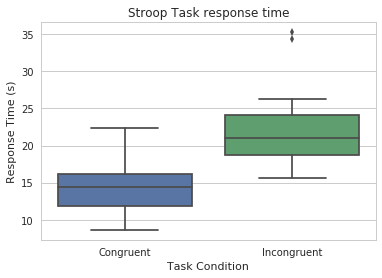

In [6]:
sns.set(style="whitegrid")
ax = sns.boxplot(data=df)
ax.set_title('Stroop Task response time')
ax.set_xlabel('Task Condition')
ax.set_ylabel('Response Time (s)');

The plot again suggests that the response time in the incongruent words condition is higher. Most of the values of the incongruent measurement are above the third quartile of the congruent measurement. And this box has two outliers. 

This is consistent with the sample statistic above. A second plot to show the distribution is a histogram. I'll plot both distributions in one plot.

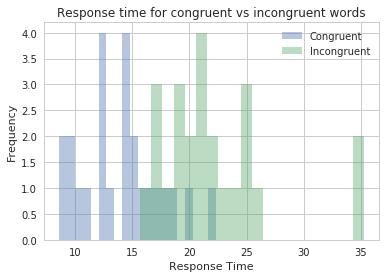

In [7]:
fig, dax = plt.pyplot.subplots()
sns.distplot(df['Congruent'], ax=dax, bins=20, axlabel=False, label='Congruent', kde=False)
sns.distplot(df['Incongruent'], ax=dax, bins=20, axlabel=False, label='Incongruent', kde=False)
dax.set_xlabel('Response Time')
dax.set_ylabel("Frequency");
dax.set_title("Response time for congruent vs incongruent words");
dax.legend();

The plot is consistent with the statistics seen so far.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

As this is an experiment with one sample and a repeated measurement and I don't know anything about the average response time of the population I choose to perform a Dependent t-test for paired samples to compare the means of two measurements. 

This is done by scipy internally as a one sample t-test using the average response time of the differences between the two measurements.

I choose a standard confidence level of 5% or 0.05 for this test.

In [8]:
from scipy import stats

In [9]:
stats.ttest_rel(df['Incongruent'], df['Congruent'])

Ttest_relResult(statistic=8.020706944109957, pvalue=4.1030005857111781e-08)

The t-statistic gives the information about how much the sample mean differs from the null hypothesis. If it lies outside the critical values of the t-distribution corresponding to the confidence level and degrees of freedom, we reject the null hypothesis. We could look up the critical values in a table but we can use scipy again for us by giving it the quantil ranges (for a two tail test and $\alpha = 0.05$ these are 0.025 and 0.975) and the degrees of freedom. This is the number of pairs minus 1 for a paired t-test. 

In [10]:
t_critical_values = (stats.t.ppf(q=0.025,df=len(df)-1), stats.t.ppf(q=0.975,df=len(df)-1))
t_critical_values

(-2.0686576104190411, 2.0686576104190406)

The t-statistic clearly is larger than the t-critical value of 2.0686576104190406 at $\alpha = 0.05$ and the degrees of freedom of 23. That means that if the null hypothesis was true the probability of finding t-statistic as extreme as this is less than 5%.

The p-value calculated is 4.1030005857111781e-08. Thas means odds of 0.000004103 of having a difference as large as (or larger than) the one in our study if the null hypothesis was true. As this p-value is way smaller than 0.05 I reject the null hypothesis. 

I have evidence to suggest that on average it takes longer to read out words in the incongruent words condition.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

I think that the Stroop Effect is evidence that our brain is a very efficient machine that automates tasks that are trained over and over again. Reading is s skill humans learn very early and what is done over and over again every day. 

In contrast if we have to do unusual tasks our brain has to think. 🤔 

That takes longer and explains - in my opinion - why it takes longer to realize the color a word is written in than the word itself. If we would train that every day the time to do that would be shorter and shorter until it takes as less time as reading a word. 

A similar task is that: https://youtu.be/MFzDaBzBlL0

### References

In addition to the documentation of Pandas, Matplotlib and Seaborn I used these websites:

- [Wikipedia: Stroop Effect](https://en.wikipedia.org/wiki/Stroop_effect)
- [Wikipedia: Student's t-test](https://en.wikipedia.org/wiki/Student%27s_t-test)
- [Neuroscience For Kids](https://faculty.washington.edu/chudler/words.html)
- [Skewed Distribution: Definition, Examples](http://www.statisticshowto.com/probability-and-statistics/skewed-distribution/)
- [Box Plot: Display of Distribution](http://www.physics.csbsju.edu/stats/box2.html)